In [1]:
## Import all the things

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline 

# The Carpentries: Programmatic Assessment Report
## 2017 Year End and 2018 Q1

# Part 1: Workshops over time

## Workshops by Carpentry by Year

### Table: All SWC & DC workshops, 2012-2018Q1
Instructor training events are analyzed separately.

In [2]:
# Load csv into df
workshops = pd.read_csv("workshops.csv")

# Clean up the tag names
workshops.loc[workshops['tag_name'].str.contains("SWC"), "tag"] = "SWC"
workshops.loc[workshops['tag_name'].str.contains("DC"), "tag"] = "DC"
workshops.loc[workshops['tag_name'].str.contains("LC"), "tag"] = "LC"
workshops.loc[workshops['tag_name'].str.contains("TTT"), "tag"] = "TTT"

# Clean up attendance value - this is inconsistently stored as NaN or 0
# All zero values should be NaN

# df.replace(-999, np.nan)
# workshops = workshops['attendance'].replace(0.0, np.nan)

workshops['attendance'] =  workshops['attendance'].replace(0.0, np.nan)

# Date data type
workshops['start'] = pd.to_datetime(workshops['start'])

# Remove instructor training events; these will be analyzed separately.
# Limit to non TTT workshops

workshops_nonTTT = workshops[workshops['tag'] != "TTT"]
workshops_nonTTT

,slug,tag_name,start,attendance,host_name,country,tag
0,2012-01-18-stsci,SWC,2012-01-18,14.0,Space Telescope Science Institute,US,SWC
1,2012-02-20-itcp,SWC,2012-02-20,50.0,International Centre for Theoretical Physics,IT,SWC
2,2012-02-23-toronto,SWC,2012-02-23,28.0,University of Toronto,CA,SWC
3,2012-03-07-indiana,SWC,2012-03-07,39.0,Indiana University,US,SWC
4,2012-03-26-mbari,SWC,2012-03-26,38.0,Monterey Bay Aquarium Research Institute,US,SWC
5,2012-03-28-nersc,SWC,2012-03-28,35.0,NERSC,US,SWC
6,2012-04-02-chicago,SWC,2012-04-02,35.0,University of Chicago,US,SWC
7,2012-04-14-utahstate,SWC,2012-04-14,32.0,Utah State University,US,SWC
8,2012-04-30-ucl,SWC,2012-04-30,44.0,University College London,GB,SWC
9,2012-05-07-michiganstate,SWC,2012-05-07,55.0,Michigan State University,US,SWC


### Workshops by Carpenty by year: Table view
The table and chart below show the number of Software Carpentry and Data Carpentry workshops has remained roughly steady for the past several years.

This may not account for unreported self-organized workshops.  The Carpentries is working to improve data collection to have more accurate reflections of our scope of work.

In [3]:
workshops_by_carpentry_year = workshops_nonTTT.groupby([workshops_nonTTT['start'].dt.year, 'tag'])['slug'].count().unstack()
workshops_by_carpentry_year['total'] = workshops_by_carpentry_year.sum(axis=1)
workshops_by_carpentry_year.index.values
workshops_by_carpentry_year = workshops_by_carpentry_year.rename(index = {2018:'2018Q1'})
workshops_by_carpentry_year

# Values should be ints not floats


tag,DC,SWC,total
start,,,
2012,NaN,38.0,38.0
2013,NaN,93.0,93.0
2014,2.0,137.0,139.0
2015,31.0,243.0,274.0
2016,72.0,273.0,345.0
2017,81.0,256.0,337.0
2018Q1,21.0,77.0,98.0


### Workshops by Carpentry by year: Chart view

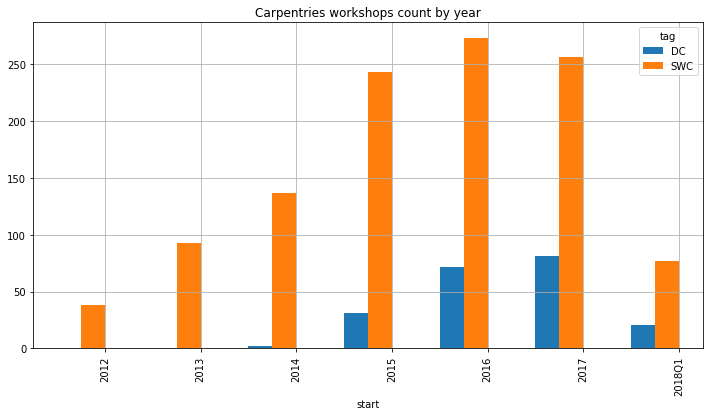

In [4]:
fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .5
title = "Carpentries workshops count by year"
workshops_by_carpentry_year.plot(y = ["DC", "SWC"], kind='bar', ax=ax, width=width, position=1, title=title)

ax.grid(True)

plt.show()

### Table: Count Total SWC and DC workshops by country by year

In [5]:
workshops_by_country_year = workshops_nonTTT.groupby(['country', workshops_nonTTT['start'].dt.year])['slug'].count().unstack()
workshops_by_country_year = workshops_by_country_year.fillna(0)
workshops_by_country_year.rename(columns={2018: '2018Q1'}, inplace=True)
workshops_by_country_year['total'] = workshops_by_country_year.sum(axis=1)
workshops_by_country_year

# Values should be ints not floats

start,2012,2013,2014,2015,2016,2017,2018Q1,total
country,,,,,,,,
AU,0.0,6.0,10.0,32.0,41.0,33.0,6.0,128.0
BE,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
BR,0.0,0.0,6.0,5.0,5.0,0.0,0.0,16.0
BW,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
CA,8.0,11.0,22.0,25.0,41.0,29.0,4.0,140.0
CH,0.0,0.0,2.0,4.0,5.0,2.0,1.0,14.0
CN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
CO,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
CY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Chart: Count Total SWC and DC workshops by country by year
*How can we make this chart easier to read?*

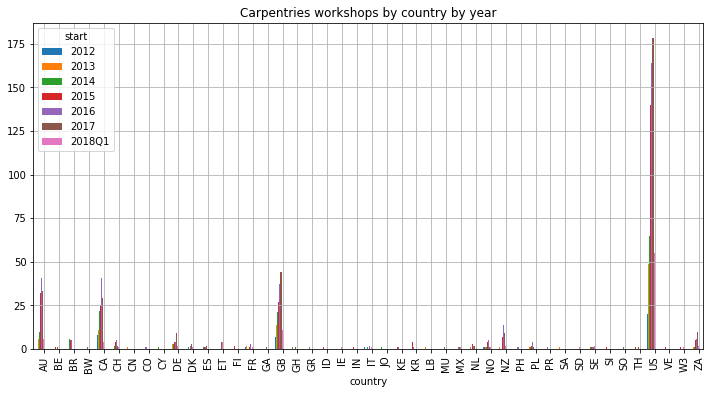

[2012, 2013, 2014, 2015, 2016, 2017, '2018Q1', 'total']

In [6]:
fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

title = "Carpentries workshops by country by year"
workshops_by_country_year.plot(y = list(workshops_by_country_year)[:-1], kind='bar', ax=ax, position=1, title=title)

ax.grid(True)

plt.show()

list(workshops_by_country_year)

### Compare Q1 2017 and Q1 2018 Workshops by country: table view

In [7]:
# # Get all workshops for 2017 Q1
workshops_2017Q1 = workshops_nonTTT[(workshops_nonTTT['start'].dt.year == 2017) & (workshops_nonTTT['start'].dt.month <= 3)]

# # Get all workshops for 2018 Q1
workshops_2018Q1 = workshops_nonTTT[(workshops_nonTTT['start'].dt.year == 2018) & (workshops_nonTTT['start'].dt.month <= 3)]

# 2017 Q1 workshops by country
workshops_by_country_year_2017Q1 = workshops_2017Q1.groupby(['country', workshops_nonTTT['start'].dt.year])['slug'].count().unstack()
workshops_by_country_year_2017Q1.rename(columns={2017:'2017Q1'}, inplace=True)

# 2018 Q1 workshops by country
workshops_by_country_year_2018Q1 = workshops_2018Q1.groupby(['country', workshops_nonTTT['start'].dt.year])['slug'].count().unstack()
workshops_by_country_year_2018Q1.rename(columns={2018:'2018Q1'}, inplace=True)

# Concatenated table, 2017 Q1 and 2018 Q1 workshops by country
workshops_by_country_year_1718Q1 = pd.concat([workshops_by_country_year_2017Q1, workshops_by_country_year_2018Q1], axis=1)

workshops_by_country_year_1718Q1
# Values should be ints not floats

start,2017Q1,2018Q1
AU,9.0,6.0
CA,10.0,4.0
CH,NaN,1.0
DE,2.0,2.0
DK,NaN,1.0
ET,NaN,4.0
FR,NaN,1.0
GB,9.0,11.0
IE,NaN,1.0
IT,NaN,1.0


### Compare Q1 2017 and Q1 2018 Workshops by country: chart view

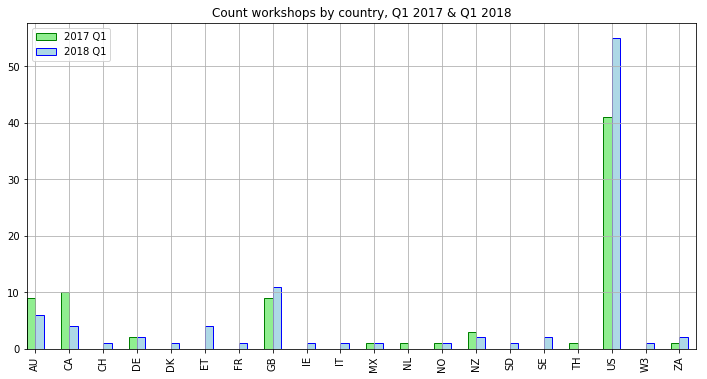

In [8]:
fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = 0.25

workshops_by_country_year_1718Q1['2017Q1'].plot(kind='bar', color='lightgreen', ax=ax, width=width, position=1, edgecolor = 'green',  linewidth = 1)
workshops_by_country_year_1718Q1['2018Q1'].plot(kind='bar', color='lightblue', ax=ax, width=width, position=0, edgecolor = 'blue',  linewidth = 1)

ax.legend(["2017 Q1", "2018 Q1"]);

# ax.set_xticklabels(workshops_by_country_2018_Q1_all_countries.country)
ax.grid(True)

plt.title("Count workshops by country, Q1 2017 & Q1 2018")

plt.show()

### Proportion of 2017 workshops that were in 2017 Q1
Rather than comparing 2017 Q1 and 2017 Q1, can we compare all 2017 and projected 2018?  This value is very close to 25%.

In [9]:
total2017 = workshops_nonTTT[workshops_nonTTT['start'].dt.year == 2017]
Q1_2017 = total2017[total2017['start'].dt.month <= 3]

total2017_count = len(total2017)
Q1_2017_count = len(Q1_2017)


Q1_2017_proportion = Q1_2017_count/total2017_count
Q1_2017_proportion


0.2344213649851632

### When did each country have its first workshop?

Data goes back to 2012; some countries were holding Carpentries workshops before this time.

In [10]:
w2 = workshops_by_country_year.copy()

# See https://stackoverflow.com/questions/31828240/first-non-null-value-per-row-from-a-list-of-pandas-columns
# and
# https://stackoverflow.com/questions/38467749/find-first-non-zero-value-in-each-row-of-pandas-dataframe

# Fill zero values with Nan to make them non valid values
res = w2[w2 != 0.0]

first_workshop = res.apply(pd.Series.first_valid_index, axis=1)
first_workshop

country
AU      2013
BE      2015
BR      2014
BW      2017
CA      2012
CH      2014
CN      2013
CO      2016
CY      2014
DE      2013
DK      2014
ES      2014
ET      2017
FI      2015
FR      2012
GA      2017
GB      2012
GH      2014
GR      2016
ID      2015
IE    2018Q1
IN      2015
IT      2012
JO      2014
KE      2015
KR      2015
LB      2013
MU      2017
MX      2016
NL      2013
NO      2012
NZ      2013
PH      2016
PL      2013
PR      2016
SA      2013
SD    2018Q1
SE      2014
SI      2015
SO      2017
TH      2015
US      2012
VE      2015
W3      2015
ZA      2013
dtype: object

### Which countries had their first workshop in 2017?


In [11]:
first_workshop_2017 = first_workshop[(first_workshop == 2017)]
first_workshop_2017

country
BW    2017
ET    2017
GA    2017
MU    2017
SO    2017
dtype: object

## Attendance at workshops

### Workshops missing attendance

In [12]:
missing_attendance = workshops_nonTTT[pd.isnull(workshops['attendance'])]
missing_attendance

/home/maneesha/.virtualenvs/surveys/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,slug,tag_name,start,attendance,host_name,country,tag
196,2014-06-02-icl-geo,"SWC,unresponsive",2014-06-02,NaN,Imperial College London,GB,SWC
379,2015-05-26-amnh,"SWC,unresponsive",2015-05-26,NaN,American Museum of Natural History,US,SWC
383,2015-05-28-monsanto,"SWC,unresponsive",2015-05-28,NaN,Monsanto,US,SWC
396,2015-06-10-sgpe,"SWC,unresponsive",2015-06-10,NaN,University of Edinburgh,GB,SWC
415,2015-06-25-PNW,DC,2015-06-25,NaN,University of Oregon,US,DC
452,2015-08-19-zurich,"DC,unresponsive",2015-08-19,NaN,University of Zurich,CH,DC
459,2015-08-24-isu,"DC,unresponsive",2015-08-24,NaN,Iowa State University,US,DC
490,2015-09-23-gfz-potsdam,SWC,2015-09-23,NaN,GFZ Potsdam,DE,SWC
518,2015-10-21-gfz-potsdam,"SWC,unresponsive",2015-10-21,NaN,GFZ Potsdam,DE,SWC
527,2015-11-02-DC-Brussels,"DC,unresponsive",2015-11-02,NaN,Belgian Science Policy (BELSPO),BE,DC


### Scatter plot showing frequency of attendance rates
Would like to add jitter to better visualize high frequencies in middle ranges.  Also overlay mean, median, mode for each year to show shift in measures of central tendancy.

/home/maneesha/.virtualenvs/surveys/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


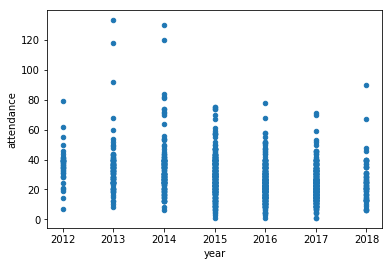

In [13]:
attendance = workshops_nonTTT[['start', 'attendance']]   #df['date'].dt.year
attendance['year'] = attendance['start'].dt.year
attendance.plot.scatter('year', 'attendance')

### Total attendance by year: Table view

In [14]:
total_attendance_by_year = attendance.groupby('year')['attendance'].sum().to_frame()
total_attendance_by_year

# Values should be ints, not floats

,attendance
year,
2012,1378.0
2013,3212.0
2014,4742.0
2015,7755.0
2016,7133.0
2017,7223.0
2018,1758.0


### Total attendance by year: Chart view

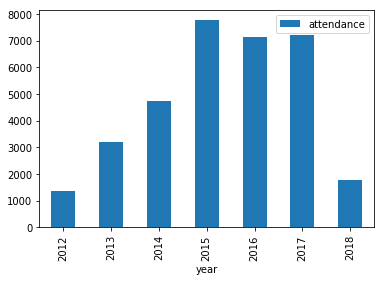

In [15]:
total_attendance_by_year.plot.bar()

### Binned attendance by year

This table shows by year, how many workshops had 1-10 learners, 11-20 learners, and so on.  Need to change the column heading 2018 to 2018Q1

In [16]:
bins = pd.cut(attendance['attendance'], [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf])
attendance.groupby(bins)['attendance'].agg(['count'])

binned_attendance_by_year = attendance.groupby([ bins, 'year'])['attendance'].agg(['count'])

binned_attendance_by_year =  binned_attendance_by_year.unstack()
binned_attendance_by_year['total'] = binned_attendance_by_year.sum(axis=1)

binned_attendance_by_year
# Values should all be ints, not floats

count                                        total
year        2012  2013  2014  2015   2016   2017  2018       
attendance                                                   
(1, 10]      1.0   2.0   2.0  16.0   23.0   22.0   6.0   72.0
(10, 20]     3.0  12.0  23.0  50.0   85.0  113.0  21.0  307.0
(20, 30]     5.0  25.0  46.0  83.0  112.0  109.0  24.0  404.0
(30, 40]    20.0  37.0  41.0  69.0   52.0   51.0  15.0  285.0
(40, 50]     6.0  10.0  11.0  29.0    9.0    9.0   2.0   76.0
(50, 60]     1.0   3.0   4.0   7.0    7.0    3.0   NaN   25.0
(60, 70]     1.0   1.0   2.0   3.0    1.0    1.0   1.0   10.0
(70, 80]     1.0   NaN   4.0   4.0    1.0    1.0   NaN   11.0
(80, 90]     NaN   NaN   3.0   NaN    NaN    NaN   1.0    4.0
(90, 100]    NaN   1.0   NaN   NaN    NaN    NaN   NaN    1.0
(100, inf]   NaN   2.0   2.0   NaN    NaN    NaN   NaN    4.0

## Instructor Training

In [17]:
badges_by_training_event = pd.read_csv("badges_by_training_event.csv")

badges_by_training_event['pct_completion'] = badges_by_training_event['count_badged'] / badges_by_training_event['attendance'] * 100
badges_by_training_event = badges_by_training_event.round({'pct_completion':1})
badges_by_training_event['start'] = pd.to_datetime(badges_by_training_event['start'])


badges_by_training_event

,count_badged,slug,attendance,country,start,pct_completion
0,17,2012-08-26-ttt-online,20,W3,2012-08-26,85.0
1,19,2012-10-11-ttt-online,25,W3,2012-10-11,76.0
2,5,2013-01-06-ttt-online,12,W3,2013-01-06,41.7
3,18,2013-03-12-ttt-online,27,W3,2013-03-12,66.7
4,18,2013-05-12-ttt-online,45,W3,2013-05-12,40.0
5,24,2013-08-12-ttt-online,41,W3,2013-08-12,58.5
6,22,2013-09-30-ttt-online,57,W3,2013-09-30,38.6
7,25,2014-01-16-ttt-online,67,W3,2014-01-16,37.3
8,3,2014-04-14-ttt-pycon,34,W3,2014-04-14,8.8
9,24,2014-04-24-ttt-online,58,W3,2014-04-24,41.4


### Number of instructor training events by country

In [38]:
trainigs_by_country = badges_by_training_event.groupby([badges_by_training_event['start'].dt.year, 'country'])['slug'].count().unstack()
trainigs_by_country['total'] = trainings_online_inperson.sum(axis=1)
trainigs_by_country.index.values
trainigs_by_country = trainigs_by_country.rename(index = {2018:'2018Q1'})
trainigs_by_country

country,AU,CA,CH,GB,NL,NO,NZ,PL,PR,US,W3,ZA,total
start,,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,10.0
2015,NaN,1.0,NaN,4.0,NaN,NaN,NaN,1.0,NaN,3.0,12.0,NaN,21.0
2016,2.0,1.0,1.0,3.0,NaN,1.0,3.0,NaN,NaN,12.0,11.0,1.0,35.0
2017,3.0,1.0,NaN,4.0,1.0,NaN,1.0,NaN,1.0,13.0,21.0,2.0,47.0
2018Q1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,1.0,NaN


### Binned completion rates for instructor training events by year

In [19]:
bins = pd.cut(badges_by_training_event['pct_completion'], [0, 25, 50, 75, 99, 100])
binned_badges_by_year = badges_by_training_event.groupby([ bins, badges_by_training_event['start'].dt.year])['pct_completion'].agg(['count'])

binned_badges_by_year =  binned_badges_by_year.unstack()
binned_badges_by_year['total'] = binned_badges_by_year.sum(axis=1)

binned_badges_by_year

# Need to add total row
# Need to remove 2018 (even Q1 - none of these people are expected to be badged)
# Values should all be ints, not floats
# Table reads "6 events in 2016 had a completion rate under 25%"


count                                 total
start           2012 2013 2014 2015  2016  2017 2018      
pct_completion                                            
(0, 25]          NaN  NaN  2.0  1.0   6.0   3.0  6.0  18.0
(25, 50]         NaN  3.0  5.0  8.0  18.0  18.0  2.0  54.0
(50, 75]         NaN  2.0  3.0  8.0   8.0  22.0  3.0  46.0
(75, 99]         2.0  NaN  NaN  3.0   3.0   3.0  NaN  11.0
(99, 100]        NaN  NaN  NaN  1.0   NaN   1.0  NaN   2.0

### Attendance and number badged by year

#### Total attendance by year

In [50]:
attendance_by_year = badges_by_training_event.groupby([badges_by_training_event['start'].dt.year, 'country'])['attendance'].sum().unstack()
attendance_by_year

# trainigs_by_country = badges_by_training_event.groupby([badges_by_training_event['start'].dt.year, 'country'])['slug'].count().unstack()


country,AU,CA,CH,GB,NL,NO,NZ,PL,PR,US,W3,ZA
start,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463.0,NaN
2015,NaN,22.0,NaN,75.0,NaN,NaN,NaN,13.0,NaN,76.0,393.0,NaN
2016,52.0,27.0,20.0,62.0,NaN,22.0,41.0,NaN,NaN,211.0,206.0,23.0
2017,57.0,23.0,NaN,83.0,16.0,NaN,28.0,NaN,12.0,189.0,359.0,62.0
2018,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,117.0,17.0


#### Total badged by year

In [51]:
badges_by_year = badges_by_training_event.groupby([badges_by_training_event['start'].dt.year, 'country'])['count_badged'].sum().unstack()
badges_by_year


country,AU,CA,CH,GB,NL,NO,NZ,PL,PR,US,W3,ZA
start,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,NaN
2015,NaN,16.0,NaN,35.0,NaN,NaN,NaN,3.0,NaN,34.0,248.0,NaN
2016,28.0,21.0,17.0,22.0,NaN,10.0,21.0,NaN,NaN,92.0,92.0,11.0
2017,28.0,10.0,NaN,46.0,6.0,NaN,14.0,NaN,2.0,109.0,189.0,23.0
2018,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,41.0,9.0


#### Percent of trainees badged per year
Note the country data shows the country the event was held in, not the country the trainee is based in.

In [58]:
percent_badged_by_year = badges_by_year/attendance_by_year*100

# badges_by_training_event.round({'pct_completion':1})
percent_badged_by_year = percent_badged_by_year.round(1)
percent_badged_by_year

country,AU,CA,CH,GB,NL,NO,NZ,PL,PR,US,W3,ZA
start,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.8,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.6,NaN
2015,NaN,72.7,NaN,46.7,NaN,NaN,NaN,23.1,NaN,44.7,63.1,NaN
2016,53.8,77.8,85.0,35.5,NaN,45.5,51.2,NaN,NaN,43.6,44.7,47.8
2017,49.1,43.5,NaN,55.4,37.5,NaN,50.0,NaN,16.7,57.7,52.6,37.1
2018,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.8,35.0,52.9


### Comparison:  Inperson vs Online Training Events
#### Number of events per year

In [48]:
# In person training events

countries = list(trainigs_by_country)
countries.remove('W3')
countries.remove('total')
inperson_trainings = trainigs_by_country[countries].sum(axis = 1).to_frame()

online_trainings = trainigs_by_country[['W3']]

trainings_online_inperson = pd.concat([country_trainings, online_trainings], axis=1)

trainings_online_inperson.rename(columns = {0:'in-person', 'W3':'online'}, inplace=True)

trainings_online_inperson


,in-person,online
start,,
2012,NaN,2.0
2013,NaN,5.0
2014,NaN,10.0
2015,9.0,12.0
2016,24.0,11.0
2017,26.0,21.0
2018Q1,4.0,7.0


### Binned completion rates for instructor training events by year: online events only

### Binned completion rates for instructor training events by year: inperson events only
